In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
!pwd

/Users/marcoghezzi/PycharmProjects/pythonProject/fear_gen/pyro


In [4]:
df_all = pd.read_csv('../output/pyro/complete_rational/correlation.csv')
df_window = pd.read_csv('../output/pyro/sliding_wind/correlation.csv')
df_window

,subject,sias_score,lds,k,pearson,r2score,person_disc,cohen_disc,icc
0,1.0,21.0,0.201,2,0.24,-1.54,0.27,0.00,-0.010162
1,1.0,21.0,0.201,5,0.30,-2.35,0.30,0.06,0.000117
2,1.0,21.0,0.201,10,0.29,-3.22,0.28,0.03,-0.027478
3,1.0,21.0,0.201,25,0.26,-4.27,0.23,0.00,-0.107454
4,1.0,21.0,0.201,50,0.23,-4.78,0.22,-0.01,-0.136812
...,...,...,...,...,...,...,...,...,...
205,54.0,17.0,1.594,10,0.87,0.03,0.83,0.16,0.443933
206,54.0,17.0,1.594,25,0.89,-0.14,0.87,0.14,0.408906
207,54.0,17.0,1.594,50,0.90,-0.27,0.85,0.14,0.374318
208,54.0,17.0,1.594,100,0.91,-0.31,0.85,0.14,0.334976


In [5]:
df_all

,subject,sias_score,lds,pearson,r2score,pearson_disc,cohen_disc
0,1.0,21.0,0.201,0.31,-4.44,0.31,0.04
1,2.0,11.0,0.828,0.71,-0.39,0.70,0.25
2,4.0,12.0,0.111,0.41,-1.49,0.40,0.05
3,5.0,30.0,0.953,0.70,-0.26,0.68,0.25
4,6.0,8.0,1.312,0.72,0.18,0.72,0.28
5,7.0,25.0,0.535,0.69,-0.73,0.70,0.22
6,13.0,16.0,0.141,0.39,-3.38,0.38,0.04
7,15.0,16.0,0.693,0.63,-0.12,0.64,0.29
8,16.0,55.0,0.621,0.36,-1.30,0.34,0.07
9,17.0,16.0,-0.382,0.25,-2.57,0.26,0.09


In [16]:
from sklearn.linear_model import LinearRegression
x_all, y_all = df_all.lds.values, df_all.pearson.values
x_all = x_all[:, np.newaxis]
reg = LinearRegression()
reg.fit(x_all, y_all)
reg_all = reg.predict(x_all)


In [65]:
list_k = df_window.k.unique()
type(list_k)

numpy.ndarray

In [120]:
predict_regr = dict()
for k in list_k:
    df_k = df_window[df_window.k == k].sort_values('lds')
    x_k, y_k = df_k.lds.values, df_k.pearson.values
    x_k = x_k[:, np.newaxis]

    reg.fit(x_k, y_k)
    reg_k = reg.predict(x_k)

    predict_regr[k] = {'x': np.array([x_k[0][0], x_k[-1][0]]), 'y': np.array([reg_k[0], reg_k[-1]])}


In [121]:
predict_regr

{2: {'x': array([-0.382,  1.594]), 'y': array([0.09419964, 0.75932143])},
 5: {'x': array([-0.382,  1.594]), 'y': array([0.14263707, 0.85080167])},
 10: {'x': array([-0.382,  1.594]), 'y': array([0.14630567, 0.92966405])},
 25: {'x': array([-0.382,  1.594]), 'y': array([0.14180746, 0.95367483])},
 50: {'x': array([-0.382,  1.594]), 'y': array([0.12479392, 0.94859301])},
 100: {'x': array([-0.382,  1.594]), 'y': array([0.13284899, 0.95842448])},
 150: {'x': array([-0.382,  1.594]), 'y': array([0.13801867, 0.96202188])}}

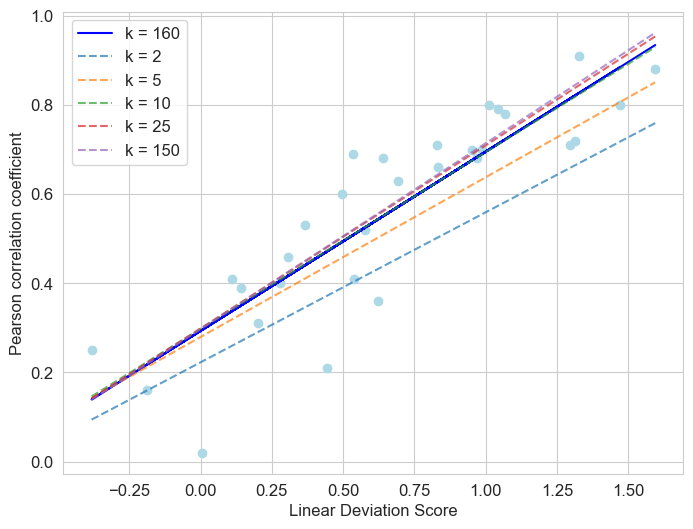

In [132]:
# single plot between k = 2 and k = 160 (all trials)
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = '12'
plt.scatter(x_all,y_all, color = 'lightblue',)


plt.plot(x_all, reg_all, '-', color='blue',  label='k = 160')
for i, j in predict_regr.items():
    if i in [100, 50]:
        continue
    x_values = j['x']
    y_values = j['y']
    plt.plot(x_values, y_values, '--', label = f'k = {i}', alpha=0.7)
plt.xlabel('Linear Deviation Score')
plt.ylabel('Pearson correlation coefficient')
plt.yticks(np.arange(0, 1.2, 0.2))
plt.legend()
plt.show()